In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time
import numpy as np

#random.seed(100)

In [2]:
### Data Preprocessing ###

dataset = pd.read_csv('/Users/swagataashwani/Desktop/MachineLearningTemplate/Eye_Surgery_Case_study/new_eye.csv')


In [3]:
dataset.head()
dataset.isna().any()
dataset['patient_sex'] = dataset['patient_sex'].astype(int)
dataset.columns

Index([u'patient_insurance', u'patient_sex', u'success', u'surgeon_id',
       u'over_under_correction', u'treatment', u'initial_severity', u'age'],
      dtype='object')

In [4]:
# One Hot Encoding

dataset['surgeon_id']= dataset['surgeon_id'].astype(str)
#dataset = pd.get_dummies(dataset['surgeon_id'], sparse=True, drop_first=True)
# Removing extra columns
response = dataset["treatment"]
dataset = dataset.drop(columns = [ 'treatment'])
dataset = pd.get_dummies(dataset)

In [5]:
dataset.head()

,patient_sex,success,initial_severity,age,patient_insurance_A,patient_insurance_B,patient_insurance_C,patient_insurance_D,patient_insurance_E,patient_insurance_F,...,surgeon_id_41,surgeon_id_43,surgeon_id_5,surgeon_id_6,surgeon_id_7,surgeon_id_8,surgeon_id_9,over_under_correction_0,over_under_correction_OVER,over_under_correction_UNDER
0,1,1,1,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,45,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,1,1,37,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,1,0,49,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [6]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.20,
                                                    random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [8]:
X_test.head()

,patient_sex,success,initial_severity,age,patient_insurance_A,patient_insurance_B,patient_insurance_C,patient_insurance_D,patient_insurance_E,patient_insurance_F,...,surgeon_id_41,surgeon_id_43,surgeon_id_5,surgeon_id_6,surgeon_id_7,surgeon_id_8,surgeon_id_9,over_under_correction_0,over_under_correction_OVER,over_under_correction_UNDER
436,0.819908,0.489807,0.985795,0.008449,-0.329612,-0.330278,-0.342791,-0.327608,-0.334921,-0.328276,...,-0.026755,-0.075864,-0.255231,-0.454679,-0.11095,-0.247185,-0.163734,0.489807,-0.161416,-0.449515
951,0.819908,0.489807,-1.014410,0.611608,-0.329612,-0.330278,-0.342791,-0.327608,-0.334921,-0.328276,...,-0.026755,-0.075864,-0.255231,-0.454679,-0.11095,-0.247185,-0.163734,0.489807,-0.161416,-0.449515
2288,0.819908,-2.041619,0.985795,0.410555,-0.329612,-0.330278,-0.342791,-0.327608,-0.334921,-0.328276,...,-0.026755,-0.075864,-0.255231,-0.454679,-0.11095,-0.247185,-0.163734,-2.041619,-0.161416,2.224620
489,-1.219649,0.489807,0.985795,0.008449,-0.329612,-0.330278,-0.342791,3.052432,-0.334921,-0.328276,...,-0.026755,-0.075864,-0.255231,-0.454679,-0.11095,-0.247185,-0.163734,0.489807,-0.161416,-0.449515
775,-1.219649,0.489807,0.985795,0.310028,-0.329612,-0.330278,-0.342791,-0.327608,-0.334921,3.046213,...,-0.026755,-0.075864,-0.255231,2.199355,-0.11095,-0.247185,-0.163734,0.489807,-0.161416,-0.449515


In [9]:
#### Model Building ####
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
### Comparing Models



Optimal number of features : 23


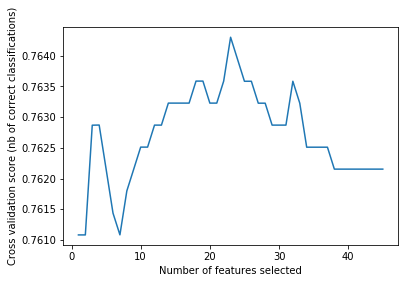

In [10]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, penalty = 'l2')
classifier1.fit(X_train, y_train)

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier1, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#Check information ratio , stepwise regression(before spliting train test, first try without any standarddization , try normalization)

In [11]:
print(rfecv.grid_scores_)

[0.76108176 0.76108176 0.76286876 0.76287132 0.76215575 0.76143636
 0.76108304 0.7617986  0.76215447 0.76251162 0.76251162 0.76287004
 0.76287004 0.76322846 0.76322846 0.76322846 0.76322846 0.76358689
 0.76358689 0.76322846 0.76322846 0.76358689 0.76430118 0.76394276
 0.76358433 0.76358433 0.76322719 0.76322719 0.76287005 0.76287005
 0.76287005 0.76358434 0.7632272  0.76251035 0.76251035 0.76251035
 0.76251035 0.76215321 0.76215321 0.76215321 0.76215321 0.76215321
 0.76215321 0.76215321 0.76215321]


In [12]:
# Predicting Test Set
y_pred = classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [13]:
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.757143   0.770898  0.721739  0.745509


Optimal number of features : 1


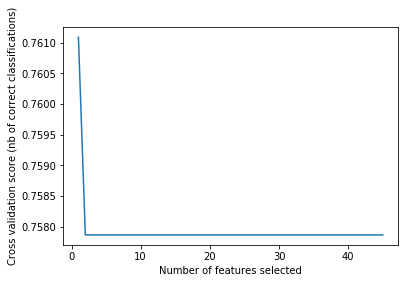

In [14]:
## SVM (Linear)
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
classifier2 = SVC(random_state = 0, kernel = 'linear')
classifier2.fit(X_train, y_train)
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier2, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [15]:
# Predicting Test Set
y_pred = classifier2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [16]:
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.757143   0.770898  0.721739  0.745509
1               SVM (Linear)  0.762857   0.767164  0.744928  0.755882


In [17]:
## SVM (rbf)
from sklearn.svm import SVC
classifier3 = SVC(random_state = 0, kernel = 'rbf')
#classifier3.fit(X_train, y_train)
classifier3.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# Predicting Test Set
y_pred = classifier3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [19]:
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.757143   0.770898  0.721739  0.745509
1               SVM (Linear)  0.762857   0.767164  0.744928  0.755882
2                  SVM (RBF)  0.748571   0.750742  0.733333  0.741935


Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 fe

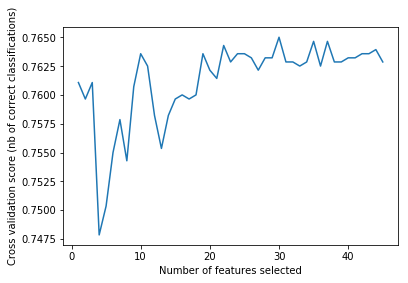

In [20]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier4.fit(X_train, y_train)
from pandas import Series

class RandomForestClassifierWithCoef(RandomForestClassifier):
    def fit(self, *args, **kwargs):
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_

rf = RandomForestClassifierWithCoef(n_estimators=500, min_samples_leaf=5, n_jobs=-1)
rfecv = RFECV(estimator=rf, step=1, cv=2, scoring='accuracy', verbose=2)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [21]:
# Predicting Test Set
y_pred = rfecv.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [22]:
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.757143   0.770898  0.721739  0.745509
1               SVM (Linear)  0.762857   0.767164  0.744928  0.755882
2                  SVM (RBF)  0.748571   0.750742  0.733333  0.741935
3      Random Forest (n=100)  0.761429   0.781646  0.715942  0.747352


In [23]:
#Neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
model = Sequential([
    Dense(units=16, input_dim = 45,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                736       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 2,173
Trainable params: 2,173
Non-trainable params: 0
_________________________________________________________________


## Training

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
2796/2796 [==============================] - 1s 244us/step - loss: 0.6939 - acc: 0.5408
Epoch 2/5
2796/2796 [==============================] - 1s 205us/step - loss: 0.6652 - acc: 0.6059
Epoch 3/5
2796/2796 [==============================] - 0s 126us/step - loss: 0.6348 - acc: 0.6592
Epoch 4/5
2796/2796 [==============================] - 0s 128us/step - loss: 0.6089 - acc: 0.6928 0s - loss: 0.5923 - acc: 0.701 - ETA: 0s - loss: 0.6040 - acc: 0
Epoch 5/5
2796/2796 [==============================] - 0s 126us/step - loss: 0.5773 - acc: 0.7242


In [27]:
score = model.evaluate(X_test, y_test)

700/700 [==============================] - 0s 84us/step


In [28]:
print(score)

[0.5767038079670498, 0.7285714292526245]


In [29]:

## K-fold Cross Validation with best model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X= X_train, y = y_train,
                             cv = 10)
print("Best Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))



Best Classifier Accuracy: 0.76 (+/- 0.04)


Test Data Accuracy: 0.7614


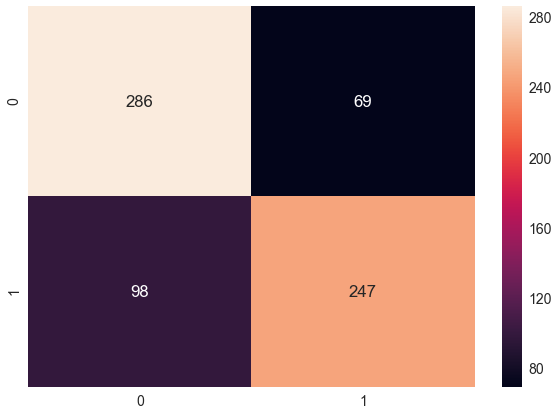

In [30]:
## Confusion Matrix with best model
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))



In [ ]:
#try hyperparameter tuning, feature engineering - stepwise regression , try - add surgeon_id with one hot encoding
from sklearn.model_selection import GridSearchCV
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [32]:
#Decision trees
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7113863287250384


In [34]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.759310035842294


In [35]:
#Stochastic GD
from sklearn.ensemble import GradientBoostingClassifier

num_trees = 100
kfold = model_selection.KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7600217613927291


In [36]:
#ensemble
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

0.7575217613927292


/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
#Calculating p value, stepwise regression

#Only initial_severity has p-value less than 0.05

import statsmodels.formula.api as sm
X_opt = X_train.drop(columns = ['age','patient_sex','patient_insurance_J','patient_insurance_G','patient_insurance_F','patient_insurance_E','patient_insurance_C','patient_insurance_I','patient_insurance_D'])
"""Running the OLS method on X_opt and storing results in regressor_OLS"""
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              treatment   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.80
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           2.36e-75
Time:                        04:24:33   Log-Likelihood:                -2764.1
No. Observations:                2796   AIC:                             5608.
Df Residuals:                    2756   BIC:                             5846.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
patient_sex                     0.0045      0.013      0.359      0.719      -0.020       0.029
success                         0.0063      0.004      1.434      0.152      -0.002       0.015
initial_severity               -0.2591      0.013    -20.146      0.000      -0.284      -0.234
age                             0.0038      0.013      0.300      0.765      -0.021       0.028
patient_insurance_A            -0.0222      0.011     -1.981      0.048      -0.044      -0.000
patient_insurance_B            -0.0130      0.011     -1.162      0.245      -0.035       0.009
patient_insurance_C             0.0112      0.011      0.995      0.320      -0.011       0.033
patient_insurance_D             0.0012      0.011      0.110      0.912      -0.021       0.023
patient_insurance_E             0.0020      0.011      0.181      0.856      -0.020       0.024
patient_insurance_F             0.0042      0.011      0.372      0.710      -0.018       0.026
patient_insurance_G             0.0045      0.011      0.401      0.688      -0.017       0.026
patient_insurance_H            -0.0075      0.011     -0.666      0.506      -0.030       0.015
patient_insurance_I             0.0140      0.011      1.258      0.209      -0.008       0.036
patient_insurance_J             0.0046      0.011      0.406      0.685      -0.017       0.027
surgeon_id_0                 2.826e-18   8.63e-18      0.328      0.743   -1.41e-17    1.97e-17
surgeon_id_10                   0.0043      0.012      0.371      0.711      -0.018       0.027
surgeon_id_11                  -0.0003      0.012     -0.022      0.983      -0.024       0.024
surgeon_id_12                  -0.0068      0.012     -0.556      0.578      -0.031       0.017
surgeon_id_13                  -0.0022      0.012     -0.186      0.853      -0.025       0.021
surgeon_id_16                  -0.0089      0.012     -0.734      0.463      -0.033       0.015
surgeon_id_17                   0.0152      0.012      1.298      0.195      -0.008       0.038
surgeon_id_18                   0.0135      0.012      1.143      0.253      -0.010       0.037
surgeon_id_19                   0.0045      0.012      0.377      0.706      -0.019       0.028
surgeon_id_2                    0.0001      0.012      0.010      0.992      -0.024       0.024
surgeon_id_20                  -0.0060      0.012     -0.511      0.609      -0.029       0.017
surgeon_id_21                  -0.0024      0.012     -0.197      0.844      -0.026       0.022
surgeon_id_22                  -0.0010      0.012     -0.083      0.934      -0.025       0.023
surgeon_id_24                   0.0034      0.012      0.272      0.786      -0.021       0.028
surgeon_id_25                   0.0181      0.012      1.528      0.127      -0.005       0.041
surgeon_id_

In [38]:
#changing threshold for logistic regression
#0.5 looks like the optimum value
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_features=20, n_samples=1000, random_state=10
)


clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)
THRESHOLD = 0.45
preds = np.where(clf.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),
                   precision_score(y_train, preds), roc_auc_score(y_train, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.763948
recall,0.747504
precision,0.774003
roc_auc_score,0.763996
